# Indian Cuisine 

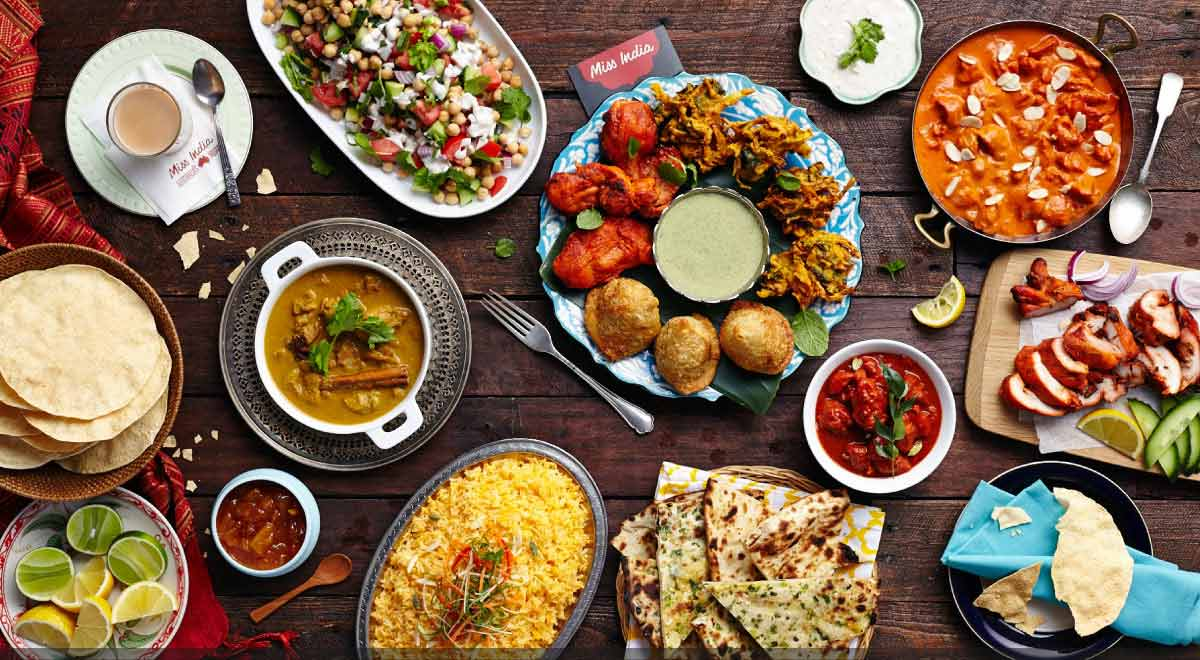

pic-credit = google-images

# Overview of Indian Food 101 Dataset

> name : name of the dish
> 
> ingredients : main ingredients used
> 
> diet : type of diet - either vegetarian or non vegetarian
> 
> prep_time : preparation time
> 
> cook_time : cooking time
> 
> flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc
> 
> course : course of meal - starter, main course, dessert, etc
> 
> state : state where the dish is famous or is originated
> 
> region : region where the state belongs
> 
> Presence of -1 in any of the columns indicates NaN value

# What We will Cover

>Nan Value Handling

>Unique Value Analysis

>Plotting Map of Indian State

>States which have high order of sweet consumption

>Ingredients which are moslty used in sweets 

>More about Veg-Cuisine 

>Overall Ingredientsused in Cuisine

**Indian Cuisine Fun Fact**

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
from wordcloud import WordCloud,STOPWORDS
from collections import Counter


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("input/indian_food.csv")

**Checking-out dataset**

In [3]:
data.head(10)

name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   
5          Imarti                          Sugar syrup, lentil flour   
6          Jalebi  Maida, corn flour, baking soda, vinegar, curd,...   
7      Kaju katli                     Cashews, ghee, cardamom, sugar   
8        Kalakand                        Milk, cottage cheese, sugar   
9           Kheer                    Milk, rice, sugar, dried fruits   

         diet  prep_time  cook_time flavor_profile   course          state  \
0  vegetarian         45         25          sweet  dessert    West Bengal   
1  vegetarian         80         30          sweet  dessert      Rajasthan   
2  vegetarian         15         60          sweet  dessert         Punjab   
3  vegetarian         15         30          sweet  dessert      Rajasthan   
4  vegetarian         15         40          sweet  dessert    West Bengal   
5  vegetarian         10         50          sweet  dessert    West Bengal   
6  vegetarian         10         50          sweet  dessert  Uttar Pradesh   
7  vegetarian         10         20          sweet  dessert             -1   
8  vegetarian         20         30          sweet  dessert    West Bengal   
9  vegetarian         10         40          sweet  dessert             -1   

  region  
0   East  
1   West  
2  North  
3   West  
4   East  
5   East  
6  North  
7     -1  
8   East  
9     -1

In [4]:
data.tail(10)

name                                        ingredients  \
245         Pani Pitha  Tea leaves, white sesame seeds, dry coconut, s...   
246             Payokh  Basmati rice, rose water, sugar, clarified but...   
247  Prawn malai curry      Coconut milk, prawns, garlic, turmeric, sugar   
248           Red Rice  Red pepper, red onion, butter, watercress, oli...   
249             Shukto  Green beans, bitter gourd, ridge gourd, banana...   
250          Til Pitha            Glutinous rice, black sesame seeds, gur   
251            Bebinca  Coconut milk, egg yolks, clarified butter, all...   
252             Shufta  Cottage cheese, dry dates, dried rose petals, ...   
253          Mawa Bati  Milk powder, dry fruits, arrowroot powder, all...   
254             Pinaca  Brown rice, fennel seeds, grated coconut, blac...   

               diet  prep_time  cook_time flavor_profile       course  \
245      vegetarian         10         20             -1  main course   
246      vegetarian         -1         -1          sweet      dessert   
247  non vegetarian         15         50          spicy  main course   
248      vegetarian         -1         -1             -1  main course   
249      vegetarian         10         20          spicy  main course   
250      vegetarian          5         30          sweet      dessert   
251      vegetarian         20         60          sweet      dessert   
252      vegetarian         -1         -1          sweet      dessert   
253      vegetarian         20         45          sweet      dessert   
254      vegetarian         -1         -1          sweet      dessert   

               state      region  
245            Assam  North East  
246            Assam  North East  
247      West Bengal        East  
248               -1          -1  
249      West Bengal        East  
250            Assam  North East  
251              Goa        West  
252  Jammu & Kashmir       North  
253   Madhya Pradesh     Central  
254              Goa        West

In [5]:
data.shape

(255, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [7]:
data.describe(include= 'object')

name          ingredients        diet flavor_profile  \
count           255                  255         255            255   
unique          255                  252           2              5   
top     Shahi tukra  Chhena, sugar, ghee  vegetarian          spicy   
freq              1                    2         226            133   

             course    state region  
count           255      255    254  
unique            4       25      7  
top     main course  Gujarat   West  
freq            129       35     74

# Nan Value Conversion
**Converting -1 to np.nan Values**

In [8]:
for x in data.columns:
    data[x] = data[x].apply(lambda x: np.nan if(x=='-1' or x==-1)else x)

**Checking Total Numbers of NaN Values and Percentage**

In [9]:
for x in data.columns:
    print('Null Value in {0} = {1} \npercent = {2:.2f}%\n'.format(x,data[x].isna().sum(),data[x].isna().sum()/len(data)))

Null Value in name = 0 
percent = 0.00%

Null Value in ingredients = 0 
percent = 0.00%

Null Value in diet = 0 
percent = 0.00%

Null Value in prep_time = 30 
percent = 0.12%

Null Value in cook_time = 28 
percent = 0.11%

Null Value in flavor_profile = 29 
percent = 0.11%

Null Value in course = 0 
percent = 0.00%

Null Value in state = 24 
percent = 0.09%

Null Value in region = 14 
percent = 0.05%



In [10]:
# we can chose not to drop the nan values 
# there are lot of method avaliable to fill the nan value 
# but we can't use that because fill region and state require the proper research and documentation

# Unique Value Analysis

Let's total check number of unique values in specific Columns

In [11]:
for x in data.columns:
    print('Unique Values in  {0} = {1}'.format(x,data[x].nunique()))

Unique Values in  name = 255
Unique Values in  ingredients = 252
Unique Values in  diet = 2
Unique Values in  prep_time = 21
Unique Values in  cook_time = 18
Unique Values in  flavor_profile = 4
Unique Values in  course = 4
Unique Values in  state = 24
Unique Values in  region = 6


Diet have 2 unique value

In [12]:
data['diet'].value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

In [13]:
fig = px.histogram(data,x='diet',color='diet',title='Unique Values in Diet Column')

fig.show()

Flavor Profile have 4 Unique Value

In [14]:
data['flavor_profile'].value_counts()

spicy     133
sweet      88
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [15]:
fig = px.histogram(data.dropna(),x='flavor_profile',color= 'flavor_profile',title = "Unique Values in flavor_profile Column")

fig.show()

Course have 4 Unique Value

In [16]:
data['course'].value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [17]:
fig = px.histogram(data,x='course',color='course',title = 'Unique Value in Course Column')

fig.show()

# Plotting Map of India

> Let's see which State High Number of Cuisine

In [18]:
sweets = data['state'].value_counts()
sweets.values


array([35, 32, 30, 24, 21, 20, 10,  9,  8,  7,  6,  6,  5,  3,  3,  2,  2,
        2,  1,  1,  1,  1,  1,  1])

In [19]:
sweets = data['state'].value_counts()
fig = px.choropleth(
    sweets,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations=sweets.index,
    color=sweets.index,
    color_continuous_scale='Reds',
    height = 700,
    hover_name = sweets.values,
    title = 'States and Total Numbers of Cuisine'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

> Checking Which Region high Number of Cuisine

In [20]:
fig = px.histogram(data.dropna(),x='region',color = 'region',title = 'Region Contribution in Indian Cuisine')
fig.show()

# States which have high order of sweet consumption

In [21]:
sweet_state = data[data['flavor_profile'] == 'sweet']
sweets = sweet_state['state'].value_counts()
fig = px.choropleth(
    sweets,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations=sweets.index,
    color=sweets.index,
    color_continuous_scale='Reds',
    height = 700,
    hover_name = sweets.values,
    title = 'States and Total Numbers of Sweets'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

# Ingredients which are moslty used in sweets 

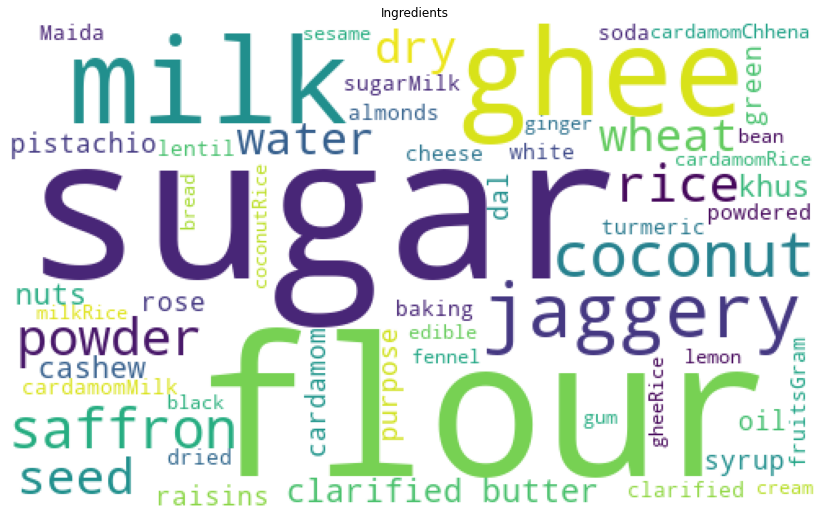

In [22]:
stopwords = set(STOPWORDS) 
def WordCloudSW(values):
    wordcloud = WordCloud(width = 500, height = 300, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(values) 
    
    plt.figure(figsize=(19,9))

    plt.axis('off')
    plt.title("Ingredients")
    plt.imshow(wordcloud)
    plt.show()


ing = ''
for x in list(sweet_state['ingredients']):
    ing+=''.join(x.split(','))
WordCloudSW(ing)


# More about Veg-Cuisine 

In [23]:
veg = data[data['diet']=='vegetarian']

#lets see Which state have high number of Veg Cuisine
sweets = veg['state'].value_counts()
fig = px.choropleth(
    sweets,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations=sweets.index,
    color=sweets.index,
    color_continuous_scale='Reds',
    height = 700,
    hover_name = sweets.values,
    title = 'States and Total Numbers of Veg Cuisine'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

Lets see what are mostly Flovar of Veg Cuisine

In [24]:
fig = px.histogram(veg.dropna(),x='flavor_profile',color= 'flavor_profile',title='Vegetarian Cuisine Flavor Profile')

fig.show()

> Lets check prepration time distribution

In [25]:
fig = px.histogram(data , x='prep_time',title = 'Total Estimated  Time for Cuisine Preperation')

fig.show()

>Lets check Cooking time Distribution

In [26]:
fig = px.histogram(data , x='cook_time',title = 'Estimated Cooking Time for Cuisine')

fig.show()

# Overall Ingredientsused in Cuisine

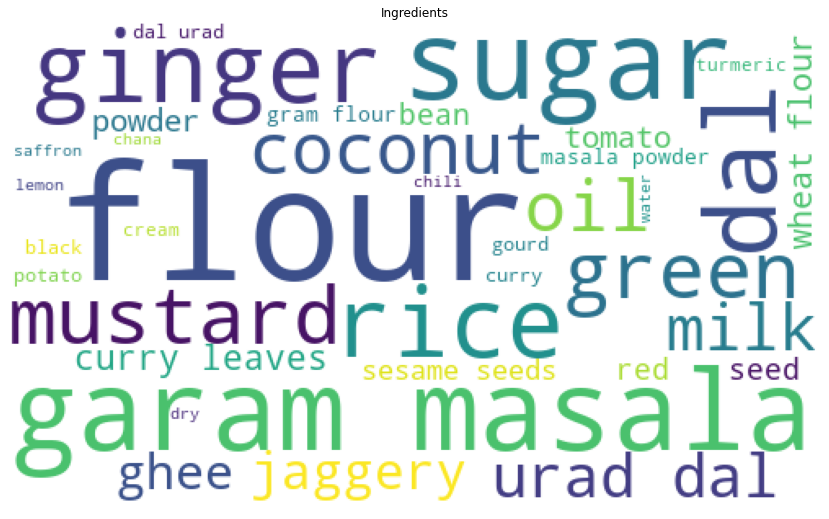

In [27]:
ing = ''
for x in list(data['ingredients']):
    ing+=''.join(x.split(','))
WordCloudSW(ing)

**If you guys have any Question/s or tip please comment, it will help me to improve**

**Thank You**

# Indian Cuisine Fun Fact

>Greek, Roman and Arab traders have contributed a lot to the first foreign flavours in Indian cuisine.

>Portuguese introduced us to refined sugar. Before that? Fruits and honey were used as sweeteners in Indian food.

>The first Indian restaurant in the USA was opened in the mid 1960s. Today, there are around 80,000 Indian restaurants in America.

>According to Indian Food Theory, our food has 6 different flavours: sweet, salty, bitter, sour, astringent and spicy.